In [207]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist.train.images  는 [55000,784] 로 구성되어있으며 이미지 784( 28 x 28)의 사아지의 이미지가 55000개 존재한다. 


mnist.train.labels  는 [55000,10] 로 구성되어있으며  결과 레이블 10개의 배열이 이미지에 1:1 대응하여 각각 존재한다. 

In [208]:
sess= tf.InteractiveSession()

C:\Users\PMS29\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [209]:
from tensorflow.examples.tutorials.mnist import input_data

In [210]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


mnist.test 는 [10000,784] 로 구성되어있으며 이미지 784( 28 x 28)의 사아지의 이미지가 10000개 존재한다. 


In [211]:
#test size 
test_images = mnist.test.images
test_labels = mnist.test.labels
print(test_images.shape)
print(test_labels.shape)

(10000, 784)
(10000, 10)


In [212]:
input = tf.placeholder(tf.float32, shape=[None, 784])

In [214]:
output = tf.placeholder(tf.float32, shape =[None,10])

In [215]:
w= tf.Variable(tf.zeros([784, 10]))

In [216]:
b= tf.Variable(tf.zeros([10]))

In [217]:
#session 
sess.run(tf.global_variables_initializer())

In [219]:
# soft max 
model = tf.nn.softmax(tf.matmul(input,w)+b)

In [220]:
# train 
cross_entropy = tf.reduce_mean(-tf.reduce_sum(output * tf.log(model), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [221]:
for i in range(1000):
  train_input, train_output = mnist.train.next_batch(100)
  sess.run(train_step,feed_dict={input:train_input , output:train_output}) 

In [228]:
#evaluation 
correct_prediction = tf.equal(tf.argmax(model,1) , tf.argmax(output,1))
accurancy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


#print the accuracncy of model using test images 
print ('정확도 : %.2f 퍼센트 ' 
       %sess.run(accurancy * 100 , feed_dict= {input:mnist.test.images, output:mnist.test.labels}))



정확도 : 91.68 퍼센트 


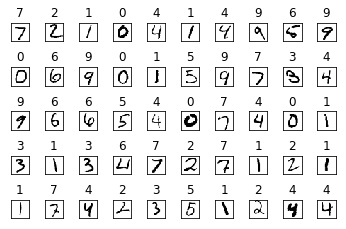

In [270]:
predict = sess.run(model, feed_dict={input:mnist.test.images, output:mnist.test.labels})

# evlatue model graphically 
# print 50 test data 

figure = plt.figure()

step = 0
for idx in range(50):
    step += 1
    subplot = figure.add_subplot(10,10,step)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(predict[idx]))
    subplot.imshow(mnist.test.images[idx].reshape(28,28),cmap=plt.cm.gray_r)
    if( step != 0 and step % 10 == 0): 
     step = step + 10   
    
plt.show()
plt.close()

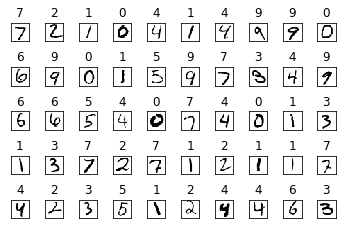

In [289]:
#Equation
Equation = sess.run(correct_prediction , feed_dict = {input:mnist.test.images, output:mnist.test.labels})

#Track unexpected precdict
figure = plt.figure()

Expression = 50
STEP = 1

for idx in range(10000):
 if(Equation[idx] == True):
    subplot=figure.add_subplot(10,10,STEP)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' %np.argmax(predict[idx]))
    subplot.imshow(mnist.test.images[idx].reshape(28,28),cmap=plt.cm.gray_r) 
    if(STEP!=0 and STEP%10==0): 
     STEP+=10 
    STEP+=1
    
    if(STEP>=Expression + 50):
     break

plt.show()
plt.close()

##################### CNN ############################

In [62]:
def weight_variables(shape):
    initial =tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

In [63]:
def bias_variables(shape):
    initial=tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [64]:
def conv2d(x,w):
    return tf.nn.conv2d(x,w,strides=[1,1,1,1] , padding='SAME')

In [65]:
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1],strides=[1,2,2,1] ,padding='SAME')

In [66]:
x_image = tf.reshape(x,[-1,28,28, 1])

In [67]:
# first convolution 
w_conv1 = weight_variables([5,5,1,32])
b_conv1 = bias_variables([32])
h_conv1 = tf.nn.relu(conv2d(x_image, w_conv1) + b_conv1 )
h_pool1 = max_pool_2x2(h_conv1)

In [68]:
#second convolution
w_conv2 = weight_variables([5,5,32,64])
b_conv2 = bias_variables([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, w_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [69]:
#fully connected with conlution 
w_fc1= weight_variables([7*7*64, 1024])
b_fc1= bias_variables([1024])
h_pool2_flat = tf.reshape(h_pool2 , [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, w_fc1) + b_fc1)

In [70]:
#drop out  : for overfitting 
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [75]:
w_fc2 = weight_variables([1024, 10])
b_fc2 = bias_variables([10])
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, w_fc2) + b_fc2)

NameError: name 'weight_variables' is not defined

In [77]:
#evaluation model
cross_entropy= tf.reduce_mean(-tf.reduce_sum(y_* tf.log(y_conv), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction=tf.equal(tf.argmax(y_conv,1 ), tf.argmax(y_, 1))
accurancy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())

for i in range(2000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accurancy = accurancy.eval(feed_dict={x:batch[0] , y_:batch[1], keep_prob:1.0 })
        print("step: %d , training accurancy %g"%(i, train_accurancy))
    train_step.run(feed_dict={x:batch[0] , y_:batch[1], keep_prob: 0.5 })
    

NameError: name 'y_conv' is not defined